<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/pp_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [116]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [117]:
import warnings

warnings.filterwarnings('ignore')

input

In [118]:
df = pd.read_csv("pp_algo.csv")

exploratory

In [119]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        153 non-null    int64
 1   Problem Solving  153 non-null    int64
 2   Interaction      153 non-null    int64
 3   Impact           153 non-null    int64
 4   Accountability   153 non-null    int64
dtypes: int64(5)
memory usage: 6.1 KB


In [120]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,52,20,27,30,0
1,52,20,27,30,0
2,52,20,27,30,0
3,52,27,27,30,0
4,52,27,27,30,0


checks

In [121]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,88.751634,31.522876,46.509804,57.300654,6.307190
std,46.655411,10.780150,13.766434,21.494823,12.152691
min,52.000000,15.000000,27.000000,30.000000,0.000000
25%,52.000000,27.000000,36.000000,55.000000,0.000000
50%,52.000000,27.000000,52.000000,55.000000,0.000000
75%,118.000000,36.000000,52.000000,64.000000,0.000000
max,181.000000,87.000000,84.000000,142.000000,46.000000


In [122]:
X=df

Scaling

In [123]:
cols = X.columns

In [124]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [125]:
X = pd.DataFrame(X, columns=[cols])

In [126]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.0,0.069444,0.0,0.0,0.0
1,0.0,0.069444,0.0,0.0,0.0
2,0.0,0.069444,0.0,0.0,0.0
3,0.0,0.166667,0.0,0.0,0.0
4,0.0,0.166667,0.0,0.0,0.0


In [127]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.000000,0.069444,0.000000,0.000,0.000000
1,0.000000,0.069444,0.000000,0.000,0.000000
2,0.000000,0.069444,0.000000,0.000,0.000000
3,0.000000,0.166667,0.000000,0.000,0.000000
4,0.000000,0.166667,0.000000,0.000,0.000000
...,...,...,...,...,...
148,0.178295,0.458333,0.438596,0.875,1.000000
149,0.178295,0.458333,0.438596,0.875,1.000000
150,0.395349,1.000000,0.000000,1.000,0.456522
151,0.395349,1.000000,0.000000,1.000,0.543478


K means

In [128]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [129]:
kmeans.cluster_centers_

array([[0.68527132, 0.27291667, 0.54473684, 0.30580357, 0.28333333],
       [0.02658998, 0.20146356, 0.21165818, 0.20372504, 0.042777  ]])

inertia

In [130]:
kmeans.inertia_

25.817555085584473

Elbow

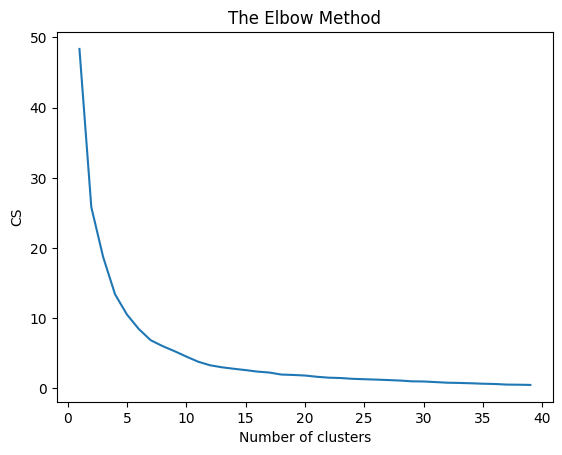

In [131]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

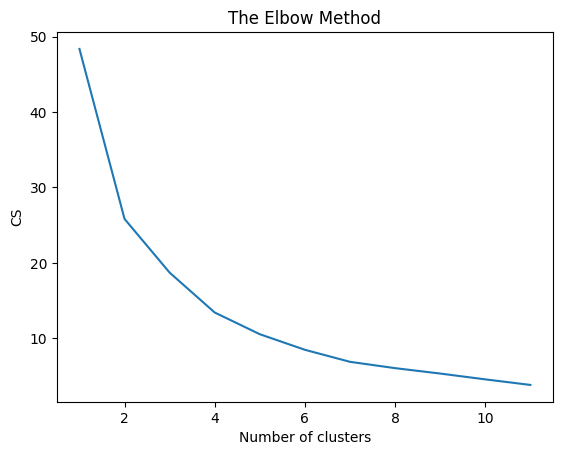

In [132]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [141]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [142]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('pp_algo_l.csv')
print(labels)

[0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 2 0
 2 0 2 2 0 2 0 2 0 2 0 2 2 2 2 0 0 0 0 0 0 2 0 2 2 2 1 1 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 2 1 1 1 0 0 1 2 0 0 0 0 1 0 1 0 0 0 0 2 2 2
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 2 2 2 0 2 2 2 0 2 2 0 1 1 0 1 0 0 2 1 0 2 0 2
 1 1 1 1 1]


In [143]:
Z=kmeans.cluster_centers_
Z

array([[5.52436960e-03, 2.04342273e-01, 2.01451906e-01, 2.00431034e-01,
        3.82308846e-02],
       [6.32059801e-01, 3.61607143e-01, 5.59523810e-01, 4.01466837e-01,
        6.30434783e-01],
       [6.68706650e-01, 1.89692982e-01, 5.04616805e-01, 2.26738722e-01,
        8.32667268e-17]])

In [144]:
import matplotlib

In [145]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 152 nearest neighbors...
[t-SNE] Indexed 153 samples in 0.001s...
[t-SNE] Computed neighbors for 153 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 153 / 153
[t-SNE] Mean sigma: 0.414078
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.971622
[t-SNE] KL divergence after 2500 iterations: -0.844390


In [146]:
np.unique(labels)


array([0, 1, 2], dtype=int32)

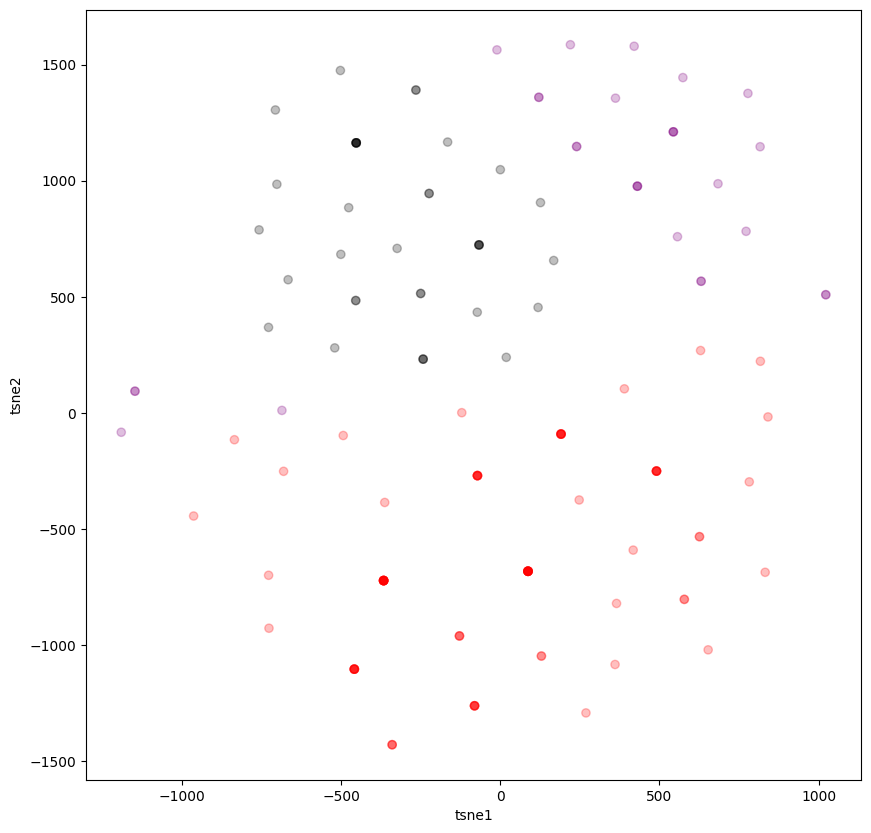

In [147]:
colors = ["red","green","blue","purple","yellow","cyan","black"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [148]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_pp_algo.csv')
Z2

array([[5.27126437e+01, 2.97126437e+01, 3.84827586e+01, 5.24482759e+01,
        1.75862069e+00],
       [1.33535714e+02, 4.10357143e+01, 5.88928571e+01, 7.49642857e+01,
        2.90000000e+01],
       [1.38263158e+02, 2.86578947e+01, 5.57631579e+01, 5.53947368e+01,
        3.83026943e-15]])